# Bank : Visualization and Supervised

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# About Dataset 

### bank client data:
1. age: (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education: (categorical: primary, secondary, tertiary and unknown)
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. balance: Balance of the individual.


### Related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



### Other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success')

Output variable (desired target):
21. Ddeposit - has the client subscribed a term deposit? (binary: 'yes','no')

Dataset Source : https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/code

# Import Library

In [1]:
#===== Pandas =====#
import pandas as pd
pd.set_option('display.max_columns',None)

#===== Numpy =====#
import numpy as np

#===== Visualization =====#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#===== Skelearn =====#
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#===== Evaluation =====#
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score)
from sklearn.metrics import confusion_matrix
#===== Other =====#
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
bank = pd.read_csv('/Volumes/HDD/Dataset/bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In this step we're going to build a baseline model to see what model that have good accuracy 

# Baseline Model

1. First we have to replace deposit column value to No = 0 and Yes = 1 because the deposit column will be the target
2. We need to normalized deposit column
3. For make baseline model we need others numerical column
4. Model for basline that will be use is KNN, Logistic Regression and Decission Tree

### Preprocessing

In [3]:
bank1 = bank.copy()

In [4]:
bank1['deposit']= bank1['deposit'].replace(['yes','no'],[1,0])

In [5]:
#This columns will be used to mak baseline model
num = ['age','balance','day','duration','campaign','pdays','previous','deposit']
base_num = bank1[num]
base_num.sample(5)

,age,balance,day,duration,campaign,pdays,previous,deposit
5885,27,574,18,196,3,-1,0,0
2462,23,0,7,217,1,99,7,1
1234,37,1314,12,118,4,210,3,1
1487,76,1411,15,170,3,-1,0,1
3106,61,4629,27,181,1,92,1,1


#### Normalize

In [6]:
base_num['deposit'].value_counts(normalize=True)*100

0    52.616019
1    47.383981
Name: deposit, dtype: float64

In [7]:
X = base_num.drop('deposit', axis=1)
y = base_num['deposit']

In [8]:
X.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [9]:
y.sample(5)

9981    0
2796    1
5148    1
6483    0
1275    1
Name: deposit, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

In [11]:
base_num.shape

(11162, 8)

In [12]:
X_train.shape

(7813, 7)

In [13]:
y_train.shape

(7813,)

# KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Predict

In [15]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 1, 1, ..., 0, 0, 1])

In [16]:
y_test

5527     0
4541     1
1964     1
5007     1
8928     0
        ..
1052     1
10702    0
10466    0
8809     0
99       1
Name: deposit, Length: 3349, dtype: int64

### Evaluation

In [17]:
print('Akurasi',accuracy_score(y_test, y_pred_knn))

Akurasi 0.7441027172290235


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Predict

In [19]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([0, 1, 1, ..., 0, 0, 1])

### Evaluation

In [20]:
print('Akurasi',accuracy_score(y_test, y_pred_reg))

Akurasi 0.722006569125112


# Decission Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### Predict

In [22]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 1, ..., 0, 0, 1])

### Evaluation

In [23]:
print('Akurasi',accuracy_score(y_test, y_pred_dt))

Akurasi 0.7226037623171095


# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### predict

In [25]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 1, 1, ..., 0, 0, 1])

### Evaluation

In [26]:
print('Akurasi',accuracy_score(y_test, y_pred_rfc))

Akurasi 0.7954613317408181


ACCURACY

1. KNN = 74%
2. LOGREG = 72%
3. DEC TREE = 72%
4. RFC = 0,79%

Random Forest Classifier is one of the high accuracy than the others, it reach 79% for baseline model

# Exploratory Data Analysis

In [27]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


For now there are no missing values

In [28]:
#To make sure missing values
bank.isnull().sum() * 100 / len(bank)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [29]:
bank.duplicated().sum()

0

There are no missing value and duplicated data

In [30]:
bank.describe().T #To show statistical summary on numerical columns

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


1. The mean age of the client is 41, The minimum is 18 years and the maximum is 95 years
2. Mean of balance is 1536 dollar, min -3058, dan max is 81204
3. Data day mean date number in a month
4. Mean of Campaign is 2.5, min 1 and max is 63
5. pdays dan previous, 75% consuments never be reached  (0,-1 = no reach yet)

In [31]:
bank.describe(include='O').T #To show statistical summary on text columns

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


1. Job with Managagement is the most high of client 
2. Client who married is the most high value
3. Client who have education background secondary has the most value in this dataset
4. Most of the client has no default credit 
5. Most of the clinet has no housing loans
6. Most of the clinet has no personal loans
7. most of the client who has contact communication tool is celluler
8. The last contact in mounth has highest value in mounth of may

In [32]:
# categorical columns 
cat_cols = []
for i in bank.columns:
    if bank[i].dtype == 'object':
        cat_cols.append(i)
       
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


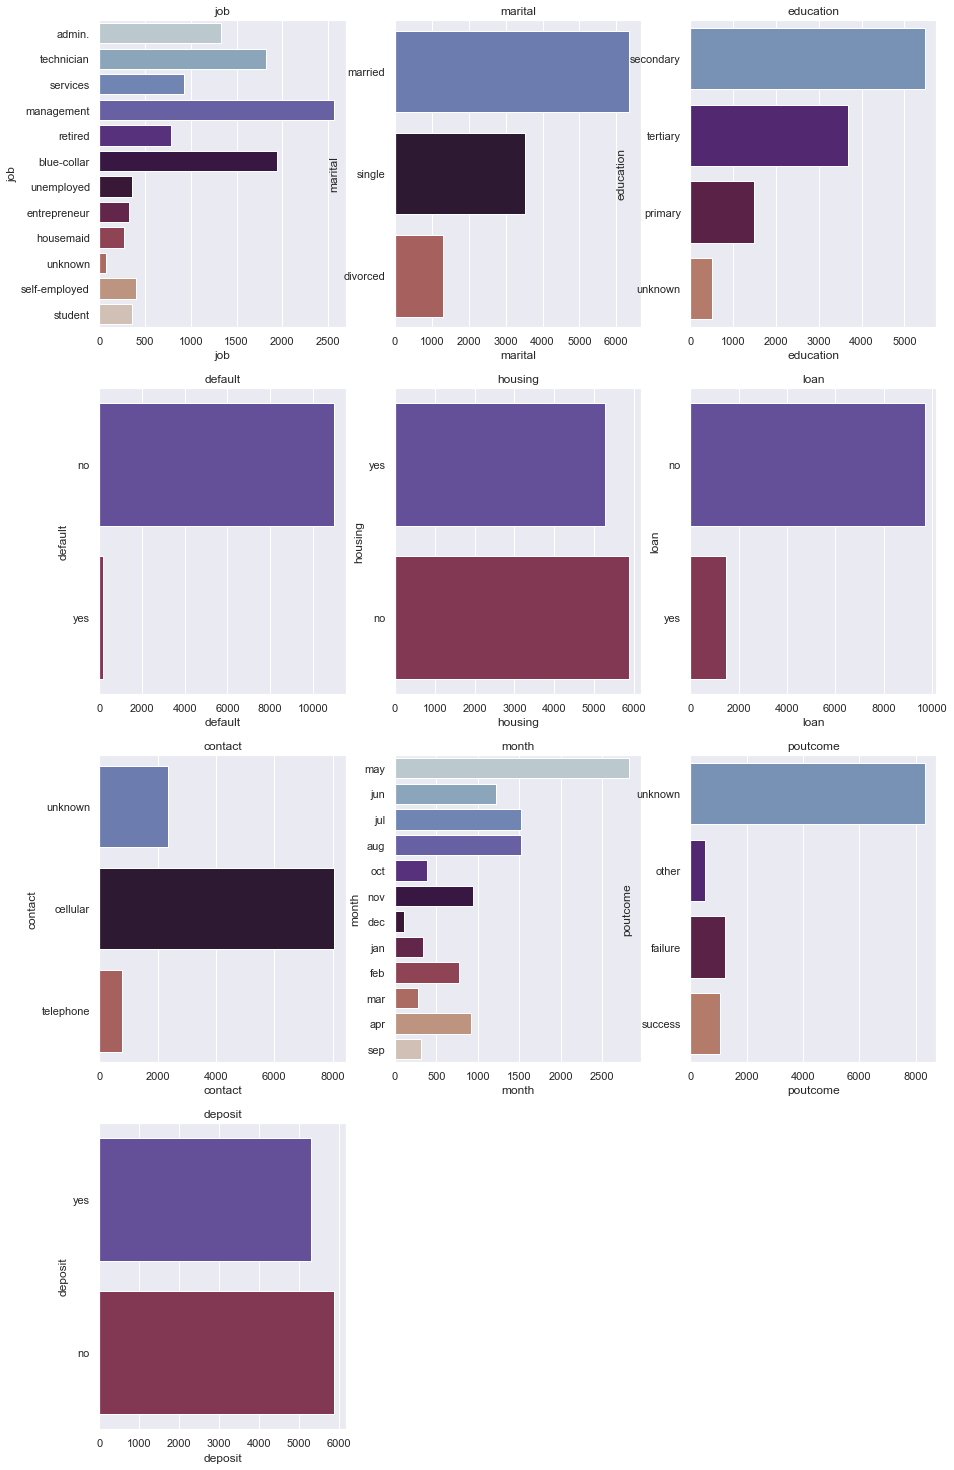

In [33]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in cat_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=bank, palette='twilight')
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [34]:
for categorical_feature in cat_cols:
    print(bank.groupby([categorical_feature]).size())

job
admin.           1334
blue-collar      1944
entrepreneur      328
housemaid         274
management       2566
retired           778
self-employed     405
services          923
student           360
technician       1823
unemployed        357
unknown            70
dtype: int64
marital
divorced    1293
married     6351
single      3518
dtype: int64
education
primary      1500
secondary    5476
tertiary     3689
unknown       497
dtype: int64
default
no     10994
yes      168
dtype: int64
housing
no     5881
yes    5281
dtype: int64
loan
no     9702
yes    1460
dtype: int64
contact
cellular     8042
telephone     774
unknown      2346
dtype: int64
month
apr     923
aug    1519
dec     110
feb     776
jan     344
jul    1514
jun    1222
mar     276
may    2824
nov     943
oct     392
sep     319
dtype: int64
poutcome
failure    1228
other       537
success    1071
unknown    8326
dtype: int64
deposit
no     5873
yes    5289
dtype: int64


Observation:

1. Job : Type of managemen are the highest type of job by followed blue-collar and technician
2. Marital : Most of clients are clients who are married.
3. Education : Client by type education backround secondary are in high
4. Month : Data in may are high by followed july and august

In [35]:
# nummerical columns 

num_cols = []

for i in bank.columns:
    if bank[i].dtype == 'int64':
        num_cols.append(i)
        
print(num_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


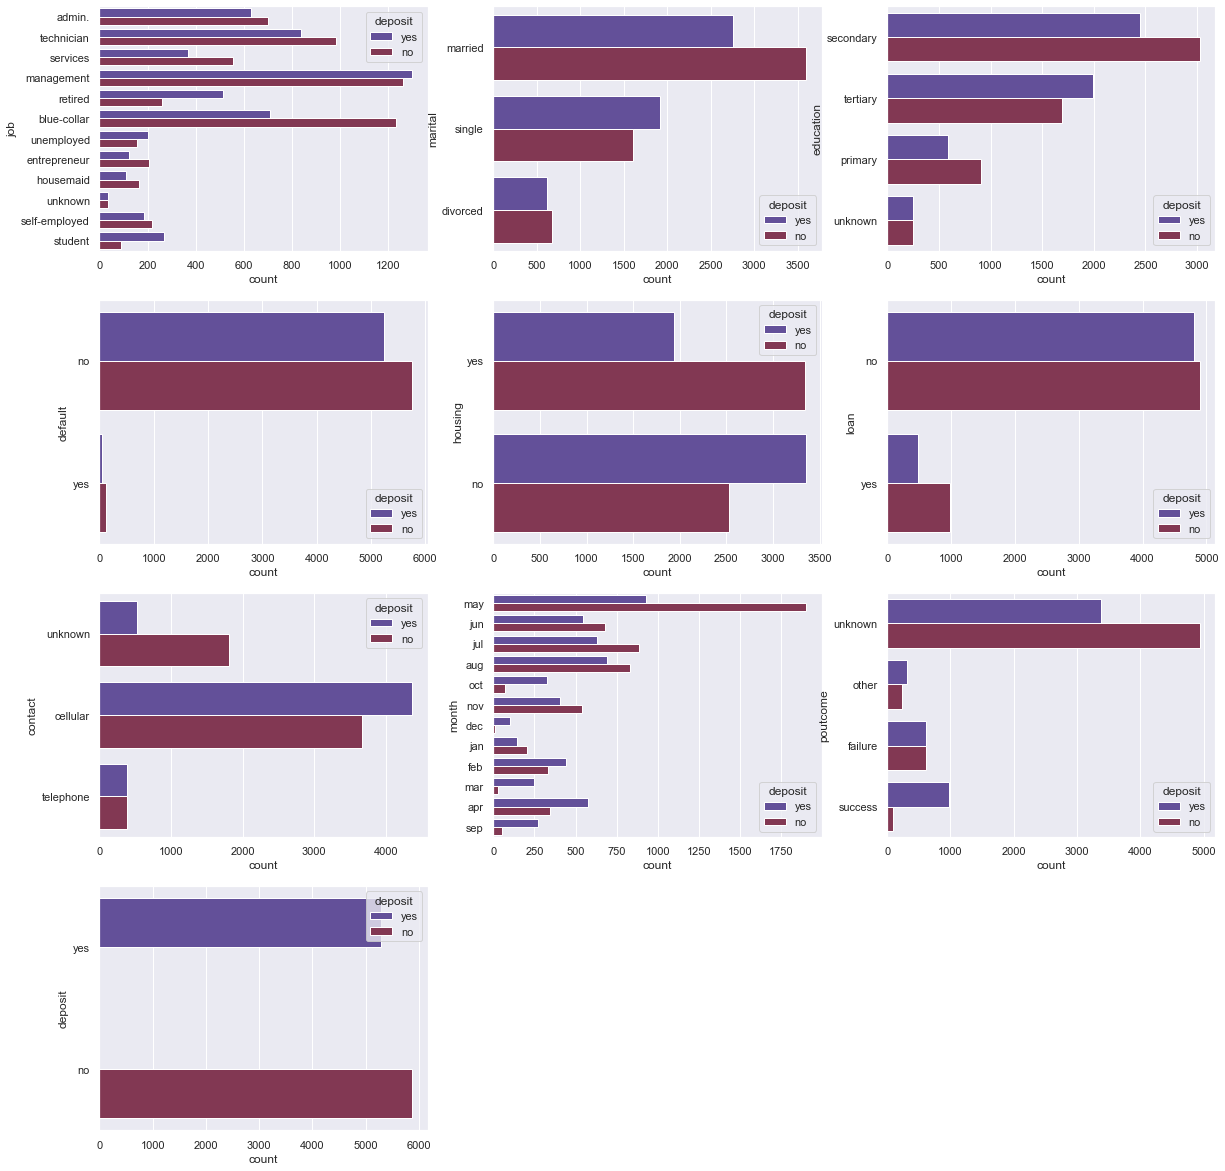

In [36]:
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for categorical_feature in cat_cols:
    ax = plt.subplot(15,3,plotnumber)
    sns.countplot(y=categorical_feature,data=bank, hue='deposit', ax=ax, palette='twilight')
    plotnumber+=1
plt.show()

In [37]:
#Check target label split over categorical features and find the count
for categorical_feature in cat_cols:
    print(bank.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

Observation :

1. retired client has high interest on deposit
2. client who has housing loan seems to be not interested much on deposit
3. if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
4. in month of March, September, October and December, client show high interest to deposit
5. in month of may, records are high but client interst ratio is very less

In [38]:
# unique values in cat_cols:

for i in cat_cols:
    print(f'{ i.upper() }:{bank[i].unique()}')
    print('\n')

JOB:['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


MARITAL:['married' 'single' 'divorced']


EDUCATION:['secondary' 'tertiary' 'primary' 'unknown']


DEFAULT:['no' 'yes']


HOUSING:['yes' 'no']


LOAN:['no' 'yes']


CONTACT:['unknown' 'cellular' 'telephone']


MONTH:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


POUTCOME:['unknown' 'other' 'failure' 'success']


DEPOSIT:['yes' 'no']




In [39]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in cat_cols:
  print(f"Value counts of {col} column")
  print(bank[col].value_counts(), '\n')

Value counts of job column
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64 

Value counts of marital column
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64 

Value counts of education column
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64 

Value counts of default column
no     10994
yes      168
Name: default, dtype: int64 

Value counts of housing column
no     5881
yes    5281
Name: housing, dtype: int64 

Value counts of loan column
no     9702
yes    1460
Name: loan, dtype: int64 

Value counts of contact column
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64 

Value counts of month column
may    2824
aug    1519
jul    1514
jun

### Column Distributed

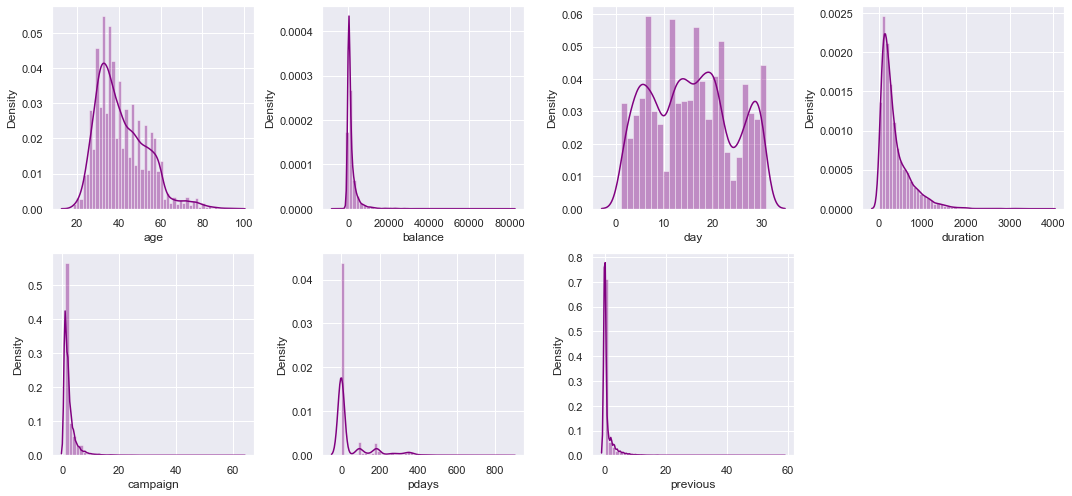

In [40]:
plt.figure(figsize=(15,7))

features = num_cols
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=bank[features[i]], color='purple')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation :

1. Only day columns has normal distributed
2. And the rest of them need to check

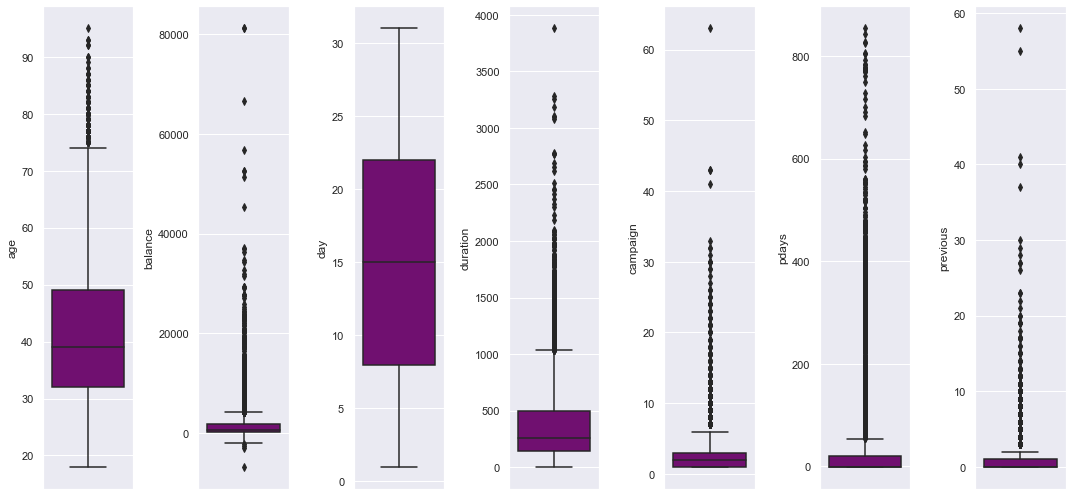

In [41]:
# adjust the figure size for better readability
plt.figure(figsize=(15,7))

# plotting
features = num_cols
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=bank[features[i]], color='purple')
    plt.tight_layout()

1. Age, balance, duration, campaign, pdays and previous has outlier and need to check
2. Only day column has no outlier

<AxesSubplot:>

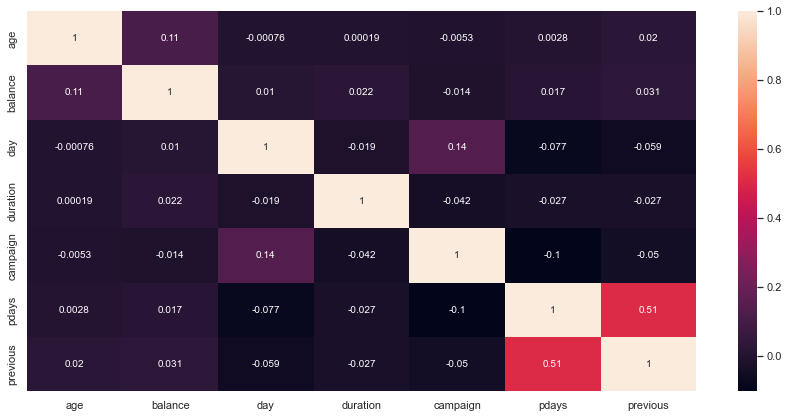

In [42]:
## Checking for correlation
cor_mat=bank.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

There are no feature is heavily correlated with other features

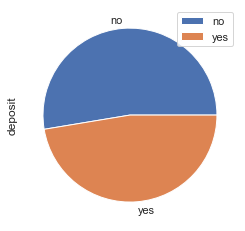

In [43]:
bank['deposit'].value_counts().plot(kind = 'pie')
sns.set(style='white')
plt.legend()
plt.show()

# Deep Dive Question

1. What is marital status in each age category?
2. What causes oh the client who have single status tend to deposit?
3. What is the educational background of age category 21-30 and 61+ so they tend to deposit?
4. What causes client who have job as management tend to deposit?


## 1. What is marital status in each age category?

In [44]:
def bin_age (x) :
    if x<=30 :
        return '21-30'
    elif x<=40 :
        return '31-40'
    elif x<=50 :
        return '41-50'
    elif x<=60 :
        return '51-60'  
    else :
        return '61+'

In [45]:
bank['age_cat'] = bank['age'].apply(bin_age)
bank['age_cat'].unique()

array(['51-60', '41-50', '31-40', '21-30', '61+'], dtype=object)

<AxesSubplot:xlabel='age_cat', ylabel='count'>

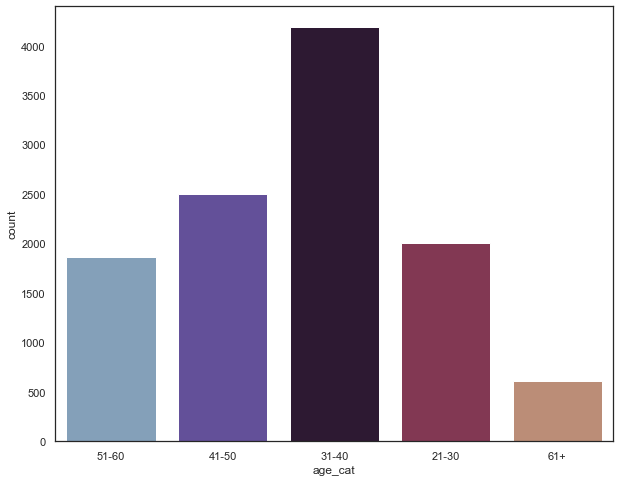

In [46]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=bank['age_cat'], palette='twilight')

In [47]:
bank['age_cat'].value_counts()

31-40    4188
41-50    2496
21-30    2007
51-60    1860
61+       611
Name: age_cat, dtype: int64

<AxesSubplot:xlabel='age_cat', ylabel='count'>

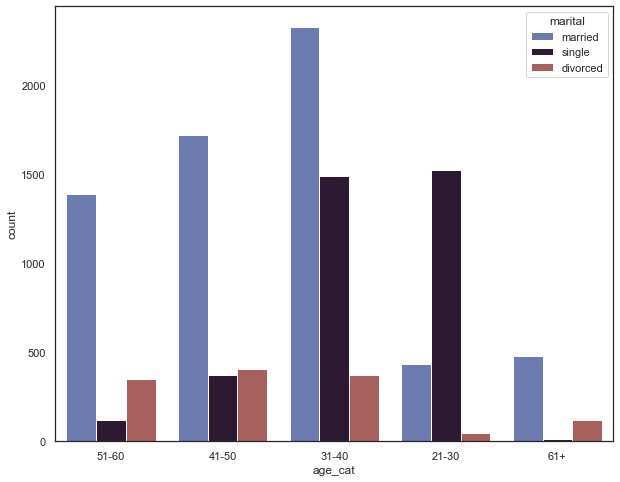

In [48]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=bank['age_cat'],
            hue=bank['marital'], data=bank,
            palette='twilight')



In [49]:
bank.groupby(['age_cat', 'marital']).size()

age_cat  marital 
21-30    divorced      44
         married      436
         single      1527
31-40    divorced     371
         married     2328
         single      1489
41-50    divorced     406
         married     1719
         single       371
51-60    divorced     351
         married     1388
         single       121
61+      divorced     121
         married      480
         single        10
dtype: int64

Text(0, 0.5, 'Deposit')

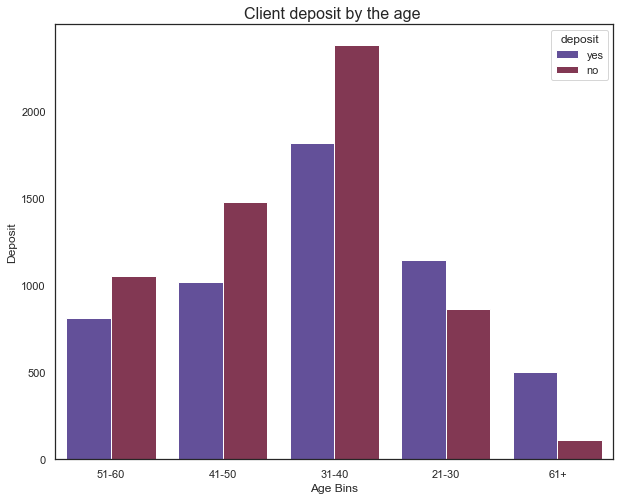

In [50]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=bank['age_cat'],
            hue=bank['deposit'], data=bank,
            palette='twilight')

#add overall title
plt.title('Client deposit by the age ', fontsize=16)

#add axis titles
plt.xlabel('Age Bins')
plt.ylabel('Deposit')

In [51]:
bank.groupby(['age_cat', 'deposit']).size()

age_cat  deposit
21-30    no          862
         yes        1145
31-40    no         2376
         yes        1812
41-50    no         1477
         yes        1019
51-60    no         1049
         yes         811
61+      no          109
         yes         502
dtype: int64

Observation :

1. Most of client in this dataset are in category 31-40 it reached 4188 client
2. Client who in category 51-50 are the client who most married
3. Client who in category 41-50 are the client who most married
4. Client who in category 31-40 are the client who most married followed by singel
5. Client who in category 20-30 are the client who most single
6. Client who in category 60+ are the client who most married followed by divorced
7. client who in category 21-30 and 60+ are the client who tend to deposit

## 2. What causes oh the client who have single status tend to deposit?

<AxesSubplot:xlabel='loan', ylabel='count'>

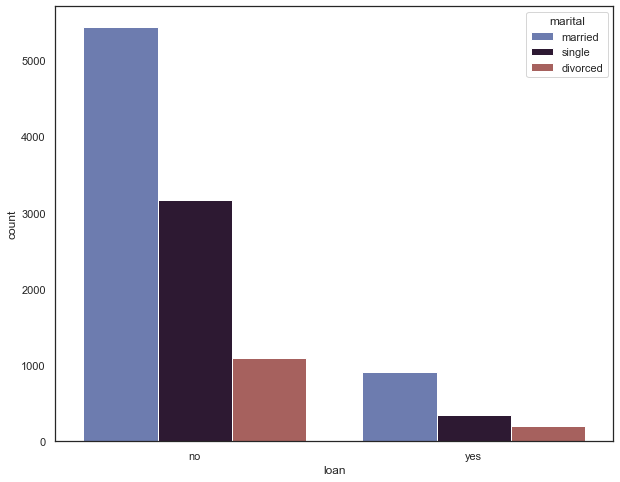

In [52]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=bank['loan'],
            hue=bank['marital'], data=bank,
            palette='twilight')

In [53]:
bank.groupby(['loan', 'marital']).size()

loan  marital 
no    divorced    1092
      married     5438
      single      3172
yes   divorced     201
      married      913
      single       346
dtype: int64

<AxesSubplot:xlabel='housing', ylabel='count'>

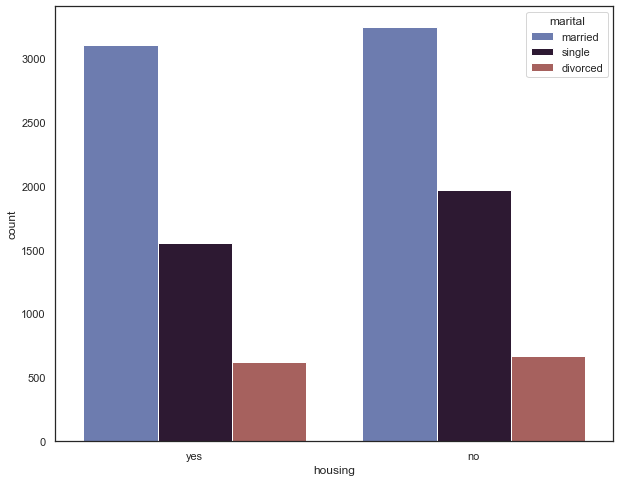

In [54]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=bank['housing'],
            hue=bank['marital'], data=bank,
            palette='twilight')

In [55]:
bank.groupby(['housing', 'marital']).size()

housing  marital 
no       divorced     668
         married     3246
         single      1967
yes      divorced     625
         married     3105
         single      1551
dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

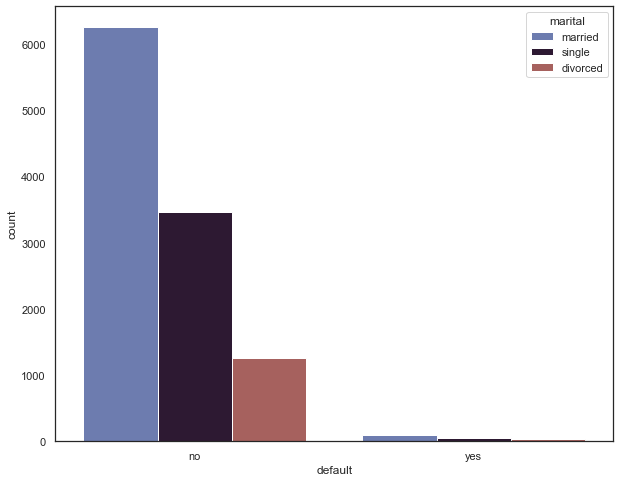

In [56]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=bank['default'],
            hue=bank['marital'], data=bank,
            palette='twilight')

In [57]:
bank.groupby(['default', 'marital']).size()

default  marital 
no       divorced    1265
         married     6260
         single      3469
yes      divorced      28
         married       91
         single        49
dtype: int64

Observation:

Client who single are the client who have the least housing loan (housing) and personal loan (loan), this is make sense why client with single marital status tend to deposit

## 3. What is the educational background of age category 21-30 and 61+ so they tend to deposit

<AxesSubplot:xlabel='age_cat', ylabel='count'>

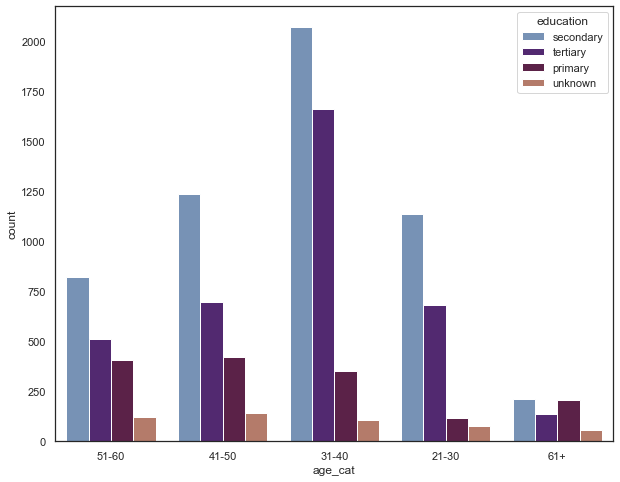

In [58]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=bank['age_cat'],
            hue=bank['education'], data=bank,
            palette='twilight')

In [59]:
bank.groupby(['age_cat', 'education']).size()

age_cat  education
21-30    primary       115
         secondary    1135
         tertiary      681
         unknown        76
31-40    primary       350
         secondary    2071
         tertiary     1662
         unknown       105
41-50    primary       423
         secondary    1236
         tertiary      698
         unknown       139
51-60    primary       406
         secondary     823
         tertiary      511
         unknown       120
61+      primary       206
         secondary     211
         tertiary      137
         unknown        57
dtype: int64

Observation :

1. Most client in category of the age 21-30 are secondary education followed by tertiary.
2. In category of the age 60+ are most primary and secondary

## 4. What causes client who have job as management tend to deposit?

<AxesSubplot:xlabel='count', ylabel='job'>

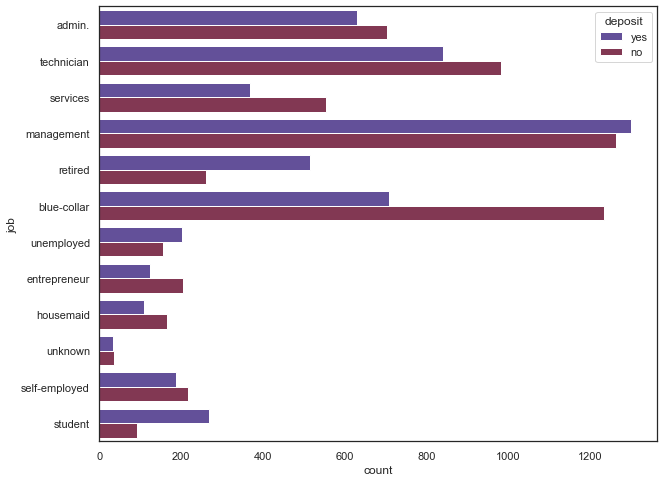

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(data = bank, y = 'job', hue = 'deposit',
            palette='twilight')

In [61]:
bank.groupby(['job', 'deposit']).size()

job            deposit
admin.         no          703
               yes         631
blue-collar    no         1236
               yes         708
entrepreneur   no          205
               yes         123
housemaid      no          165
               yes         109
management     no         1265
               yes        1301
retired        no          262
               yes         516
self-employed  no          218
               yes         187
services       no          554
               yes         369
student        no           91
               yes         269
technician     no          983
               yes         840
unemployed     no          155
               yes         202
unknown        no           36
               yes          34
dtype: int64

<AxesSubplot:xlabel='balance', ylabel='job'>

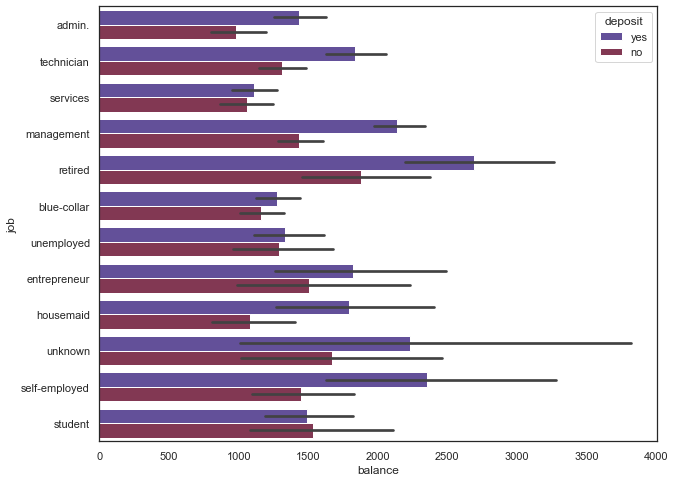

In [62]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.barplot(y='job', x='balance', hue= 'deposit', data=bank, palette='twilight')

Observation :

The client who have job as management tend to have high balance, it make sense because they have high balance so they tend to deposit

# Feature Engginering

In [63]:
bank2 = bank.copy()

In [64]:
bank2.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_cat
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,51-60
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,51-60
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,41-50
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,51-60
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,51-60
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,41-50
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,51-60
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,51-60
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,31-40
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes,21-30


In [65]:
#bank1.drop(['pdays'],axis=1, inplace=True)

In [66]:
#bank2.drop(['poutcome','duration','contact', 'age_cat', 'job'],axis=1, inplace=True)

In [67]:
bank2.drop(['age_cat'],axis=1, inplace=True)

In [68]:
bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [69]:
#feature engineering
bank2['deposit'] = bank2['deposit'].replace(['yes','no'],[1,0])
bank2['housing'] = bank2['housing'].replace(['yes','no'],[1,0])
bank2['loan'] = bank2['loan'].replace(['yes','no'],[1,0])
bank2['default'] = bank2['default'].replace(['yes','no'],[1,0])
bank2['month'] = bank2['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12])


In [70]:
#non-ordinal
train = pd.get_dummies(bank2, columns= ['marital', 'job', 'poutcome', 'education', 'contact'])

In [71]:
#train = pd.get_dummies(bank2, columns= ['job', 'marital', 'education'])

In [72]:
train.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,59,0,2343,1,0,5,5,1042,1,-1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,56,0,45,0,0,5,5,1467,1,-1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,41,0,1270,1,0,5,5,1389,1,-1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,55,0,2476,1,0,5,5,579,1,-1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,54,0,184,0,0,5,5,673,2,-1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [73]:
for i in train['pdays']:
  if i == -1:
    train['pdays'] = train['pdays'].replace(i,0)
  if i > 0 :
    train['pdays'] = train['pdays'].replace(i,1/i)

In [74]:
train.sample(5)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
2429,21,0,216,0,0,5,8,414,1,0.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8125,60,0,758,0,0,3,2,282,1,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2851,30,0,944,0,0,29,10,251,2,0.000000,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2324,26,0,1595,0,0,15,6,155,1,0.009524,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
10349,60,0,228,1,0,28,5,249,11,0.000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1


In [75]:
train.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [76]:
a = train.deposit.value_counts(normalize=True)

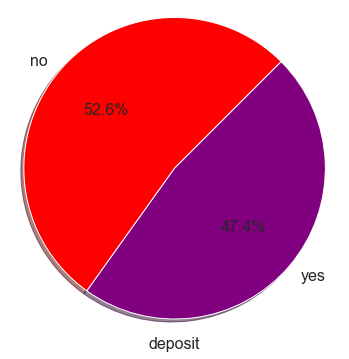

In [77]:
plt.figure(figsize=(6,6))

deposit = a.index
count = a.values
colors= ['red','purple']

plt.pie(count, labels=['no','yes'],
        shadow=True,
        colors=colors, 
        autopct='%1.1f%%',
        startangle=45,
        textprops={'fontsize': 16})

plt.xlabel('deposit',fontsize=16)
plt.axis('equal')
plt.show()

The target seems to be balance

# Build Machine Learning Model

### Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

X = train.drop(['deposit'],axis=1)
y = train['deposit']

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
X = X_train_1
y = y_train_1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [80]:
y_train_1.shape

(8929,)

# Random Forest Classifier

In [81]:
# modeling using RandomForest using validation data
from sklearn.ensemble import RandomForestClassifier
rf_val = RandomForestClassifier(random_state=42)
rf_val.fit(X_train, y_train)
preds_rf_val = rf_val.predict(X_val)
     

In [82]:
print('Akurasi',accuracy_score(y_val, preds_rf_val))

Akurasi 0.8561030235162373


#### Evaluation

In [83]:
# calculate Precision
print('Precision ',precision_score(y_val, preds_rf_val))
# calculate Recall
print('Recall ',recall_score(y_val, preds_rf_val))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds_rf_val))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_val, preds_rf_val))

Precision  0.8338870431893688
Recall  0.8755813953488372
F1 Score  0.8542257515598413
ROC-AUC  0.8567971771560601


In [84]:
rf_test = RandomForestClassifier(random_state=42)
rf_test.fit(X_train, y_train)
preds_rf_test = rf_test.predict(X_test)

In [85]:

# calculate Precision
print('Precision ',precision_score(y_test, preds_rf_test))
# calculate Recall
print('Recall ',recall_score(y_test, preds_rf_test))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds_rf_test))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_test, preds_rf_test))

Precision  0.8080357142857143
Recall  0.8481724461105904
F1 Score  0.8276177411979881
ROC-AUC  0.8318906827465473


In [86]:
print('Akurasi',accuracy_score(y_test, preds_rf_test))

Akurasi 0.8311688311688312


              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



Text(30.5, 0.5, 'Real Value')

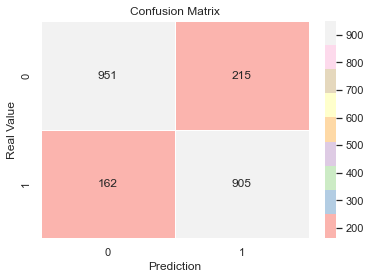

In [87]:

cnf_matrix = confusion_matrix(y_test, preds_rf_test)
print(classification_report(y_test, preds_rf_test))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

In [88]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [89]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_val, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train_1, y_train_1)


CPU times: user 20.1 s, sys: 557 ms, total: 20.7 s
Wall time: 22.4 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [90]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')


,params,mean_test_score,rank_test_score
23,"{'max_depth': 5, 'n_estimators': 40}",0.828043,1
22,"{'max_depth': 5, 'n_estimators': 30}",0.821648,2
21,"{'max_depth': 5, 'n_estimators': 20}",0.815722,3
20,"{'max_depth': 5, 'n_estimators': 10}",0.812404,4
24,"{'max_depth': 5, 'n_estimators': 50}",0.811938,5
17,"{'max_depth': 4, 'n_estimators': 30}",0.768838,6
18,"{'max_depth': 4, 'n_estimators': 40}",0.764573,7
19,"{'max_depth': 4, 'n_estimators': 50}",0.759833,8
16,"{'max_depth': 4, 'n_estimators': 20}",0.758651,9
15,"{'max_depth': 4, 'n_estimators': 10}",0.719564,10


In [91]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_val, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train_1, y_train_1)

CPU times: user 10.4 s, sys: 297 ms, total: 10.7 s
Wall time: 18.3 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

RandomizedCV looks more fast

In [92]:
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'n_estimators': 50, 'max_depth': 5}",0.811938,1
3,"{'n_estimators': 30, 'max_depth': 4}",0.768838,2
6,"{'n_estimators': 40, 'max_depth': 4}",0.764573,3
7,"{'n_estimators': 20, 'max_depth': 4}",0.758651,4
1,"{'n_estimators': 30, 'max_depth': 3}",0.716017,5
4,"{'n_estimators': 10, 'max_depth': 3}",0.694452,6
9,"{'n_estimators': 30, 'max_depth': 1}",0.681446,7
0,"{'n_estimators': 40, 'max_depth': 2}",0.679541,8
2,"{'n_estimators': 50, 'max_depth': 2}",0.676937,9
8,"{'n_estimators': 10, 'max_depth': 1}",0.603264,10


In [93]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1166
           1       0.79      0.81      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



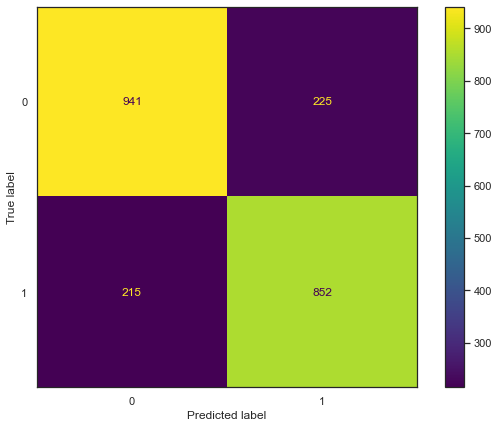

In [94]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

# SUMMARY

Recommendation

1. Maximize more on clients who are over 60 years old whose job status is retired
2. The campaign should focus on clients who are in the age of 20-30
3. The campaign must be carried out on clients who work in management

Confusion Matrix

Based on the provided confusion matrix, the following conclusions can be drawn:

True Positive (TP): The number of cases correctly predicted as "Deposit Yes" is 941. This means that the model correctly identified 941 cases that are actually deposits as "Deposit Yes".

True Negative (TN): The number of cases correctly predicted as "Deposit No" is 852. The model accurately identified 852 cases that are actually not deposits as "Deposit No".

False Positive (FP): The number of cases incorrectly predicted as "Deposit Yes" is 225. The model predicted "Deposit Yes" for 225 cases that are actually not deposits ("Deposit No").

False Negative (FN): The number of cases incorrectly predicted as "Deposit No" is 215. The model predicted "Deposit No" for 215 cases that are actually deposits ("Deposit Yes").



Random Forest with hyperparameter tuning 